### <font face="微软雅黑" size=5 > Step 1: 读取数据

<font face="微软雅黑" size=3 > 读取 repository_data.csv ，包含字段：name，stars_count，forks_count	watchers，pull_requests，primary_language，languages_used，commit_count，created_at，licence


In [1]:
import pandas as pd

# 读取 repository_data.csv 文件
repository_data = pd.read_csv('github-dataset/repository_data.csv')

# 显示前几行数据
print(repository_data.head())

                          name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811        21470      4298   
2       free-programming-books       262380        53302      9544   
3  coding-interview-university       244927        65038      8539   
4                      awesome       235223        24791      7446   

   pull_requests primary_language  \
0          31867       TypeScript   
1           1949              NaN   
2           8235              NaN   
3            867              NaN   
4           1859              NaN   

                                      languages_used  commit_count  \
0  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...       32231.0   
1                                                NaN        3189.0   
2                                                NaN        8286.0   
3                                                NaN        2314.0   
4     

### <font face="微软雅黑" size=5 > Step 2: 预处理数据

<font face="微软雅黑" size=3 > 检查数据发现，部分字段存在异常值NaN, 检查异常值的数量，如果比例不大（<5%），则考虑剔除；如果比例较大，则考虑填充。

In [2]:
# 逐个字段检查异常值的数量
for column in repository_data.columns:
    nan_count = repository_data[column].isna().sum()
    print(f"{column}: {nan_count} 个异常值")

name: 13 个异常值
stars_count: 0 个异常值
forks_count: 0 个异常值
watchers: 0 个异常值
pull_requests: 0 个异常值
primary_language: 218573 个异常值
languages_used: 221984 个异常值
commit_count: 1921 个异常值
created_at: 0 个异常值
licence: 1378200 个异常值


<font face="微软雅黑" size=3 >
对于有异常值的字段：<br> name - 剔除所在行 <br>
primary_language - 填充 'None'<br> 
languages_used - 填充 '['None']' <br> 
commit_count - 剔除所在行 <br>
licence - 填充 'Unkonwn'

In [3]:
# 处理异常值
# 剔除 name 和 commit_count 字段中的异常值所在行
repository_data = repository_data.dropna(subset=['name', 'commit_count'])

# 填充 primary_language 字段中的异常值为 'None'
repository_data['primary_language'].fillna('None', inplace=True)

# 填充 languages_used 字段中的异常值为 '['None']'
repository_data['languages_used'].fillna("['None']", inplace=True)

# 填充 licence 字段中的异常值为 'Unknown'
repository_data['licence'].fillna('Unknown', inplace=True)

# 检查处理后是否还有异常值
for column in repository_data.columns:
    nan_count = repository_data[column].isna().sum()
    print(f"{column}: {nan_count} 个异常值")

name: 0 个异常值
stars_count: 0 个异常值
forks_count: 0 个异常值
watchers: 0 个异常值
pull_requests: 0 个异常值
primary_language: 0 个异常值
languages_used: 0 个异常值
commit_count: 0 个异常值
created_at: 0 个异常值
licence: 0 个异常值


<font>数据处理完成，这里只剔除很小比例的数据（<1%），不会对后续分析产生影响

### <font face="微软雅黑" size=5 > Step 3: 分析并可视化数据

<font>数据摘要 <br>
      标称属性:'primary_language', 'languages_used', 'licence', 'created_at'  ---  给出每个可能取值的频数 <br>
      数值属性:'stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count' --- 给出5数概括

In [4]:
# 标称属性的频数统计
nominal_attributes = ['primary_language', 'languages_used', 'licence', 'created_at']
for attribute in nominal_attributes:
    freq_counts = repository_data[attribute].value_counts()
    print(f"标称属性 '{attribute}' 的频数统计:")
    print(freq_counts)
    print()

# 数值属性的五数概括
numeric_attributes = ['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count']
numeric_summary = repository_data[numeric_attributes].describe()
print("数值属性的五数概括:")
print(numeric_summary)


标称属性 'primary_language' 的频数统计:
primary_language
JavaScript              451953
Python                  451472
None                    216652
Java                    202393
C++                     150064
                         ...  
LoomScript                   1
Ragel in Ruby Host           1
Edje Data Collection         1
Sieve                        1
Ox                           1
Name: count, Length: 498, dtype: int64

标称属性 'languages_used' 的频数统计:
languages_used
['Python']                                                        257679
['None']                                                          220063
['JavaScript']                                                    157741
['Java']                                                          117624
['C#']                                                             60299
                                                                   ...  
['Svelte', 'TypeScript', 'JavaScript', 'HTML', 'CSS', 'Rust']          1
['Dockerfile', '

<font> 数据可视化 <br>
使用直方图、盒图和饼图检查数据分布

<Figure size 1200x800 with 0 Axes>

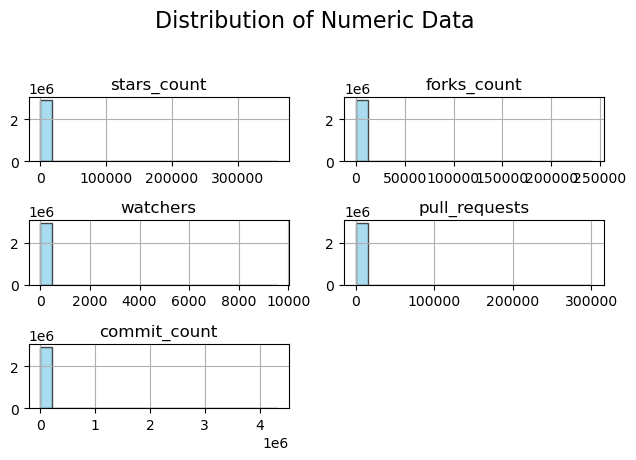

In [5]:
import matplotlib.pyplot as plt

# 创建一个包含其他数值型数据的子数据集
numeric_data = repository_data[['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count']]

# 绘制直方图
plt.figure(figsize=(12, 8))
numeric_data.hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Numeric Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<font> 可以看到由于小数值（如1、2、3...）的频率，导致直方图展示不佳，因此考虑使用对数刻度

<Figure size 1200x800 with 0 Axes>

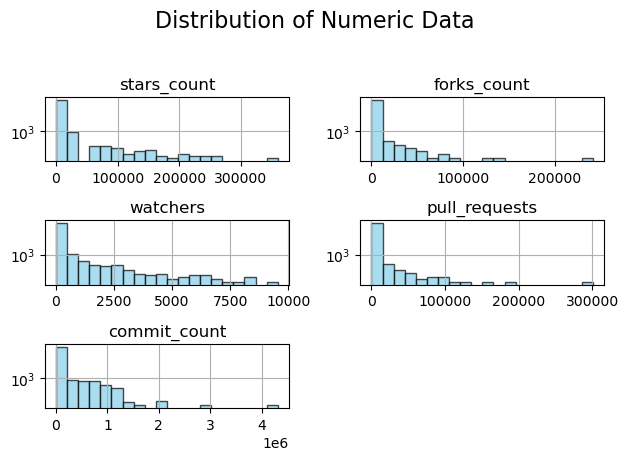

In [14]:
import matplotlib.pyplot as plt

# 创建一个包含其他数值型数据的子数据集
numeric_data = repository_data[['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count']]

# 绘制直方图，并使用对数刻度
plt.figure(figsize=(12, 8))
numeric_data.hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7, log=True)  # 设置log=True使用对数刻度
plt.suptitle('Distribution of Numeric Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<font> 统计 primary_language,languages_used 字段中编程语言的频率，不统计'None'；为了展示简洁，将出现频率低于2%的语言合并为 'Others'

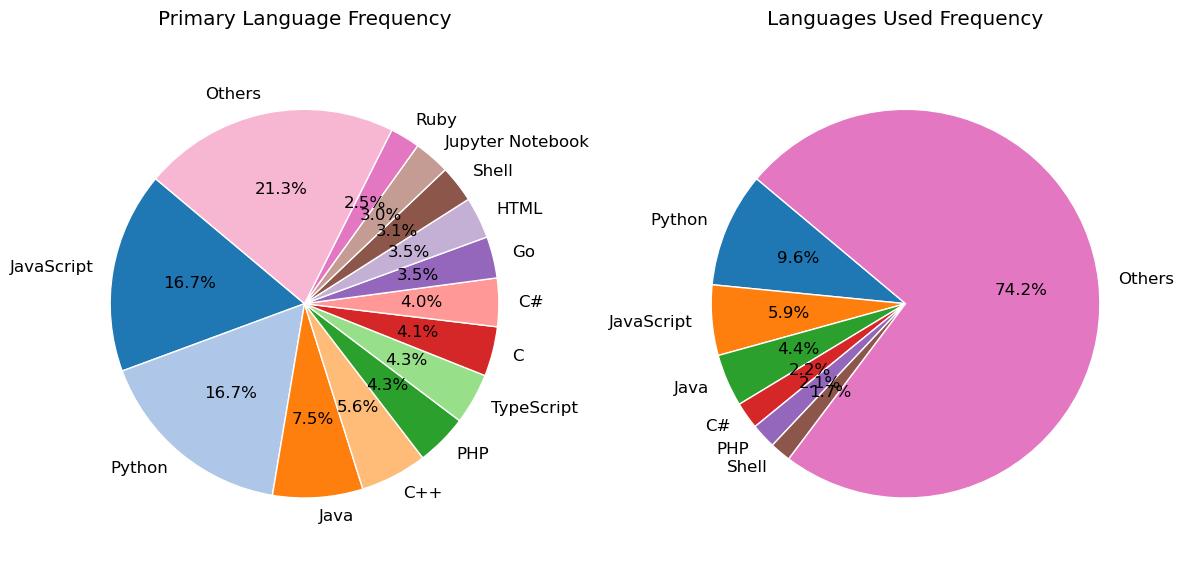

In [42]:
import matplotlib.pyplot as plt

# 统计 primary_language 字段中编程语言的频率，不统计 'None'
primary_language_freq = repository_data['primary_language'].value_counts(normalize=True)
primary_language_freq.drop(index='None', inplace=True)

# 将频率低于2%的语言合并为 'Others'
others_freq = primary_language_freq[primary_language_freq < 0.02].sum()
primary_language_freq = primary_language_freq[primary_language_freq >= 0.02]
primary_language_freq['Others'] = others_freq

# 绘制 primary_language 字段的饼图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(primary_language_freq, labels=primary_language_freq.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Primary Language Frequency')
plt.axis('equal')  # 保持长宽比相等

# 将 languages_used 字段中的每个元素处理成单个字符串
cleaned_languages_used = repository_data['languages_used'].explode()

# 去除不必要的符号，并统计频率
languages_used_freq = cleaned_languages_used.str.strip("[]").str.strip("'").value_counts(normalize=True)

# 删除 'None' 值
if 'None' in languages_used_freq.index:
    languages_used_freq.drop(index='None', inplace=True)

# 将频率低于1.5%的语言合并为 'Others'
threshold = 0.015
others_freq = languages_used_freq[languages_used_freq < threshold].sum()
languages_used_freq = languages_used_freq[languages_used_freq >= threshold]
languages_used_freq['Others'] = others_freq

# 绘制 languages_used 字段的饼图
plt.subplot(1, 2, 2)
plt.pie(languages_used_freq, labels=languages_used_freq.index, autopct='%1.1f%%', startangle=140,  wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Languages Used Frequency')
plt.axis('equal')  # 保持长宽比相等

plt.tight_layout()
plt.show()


<font> 从图中看出主要语言以JS和Python使用最广泛，而语言使用率最高的则是Python

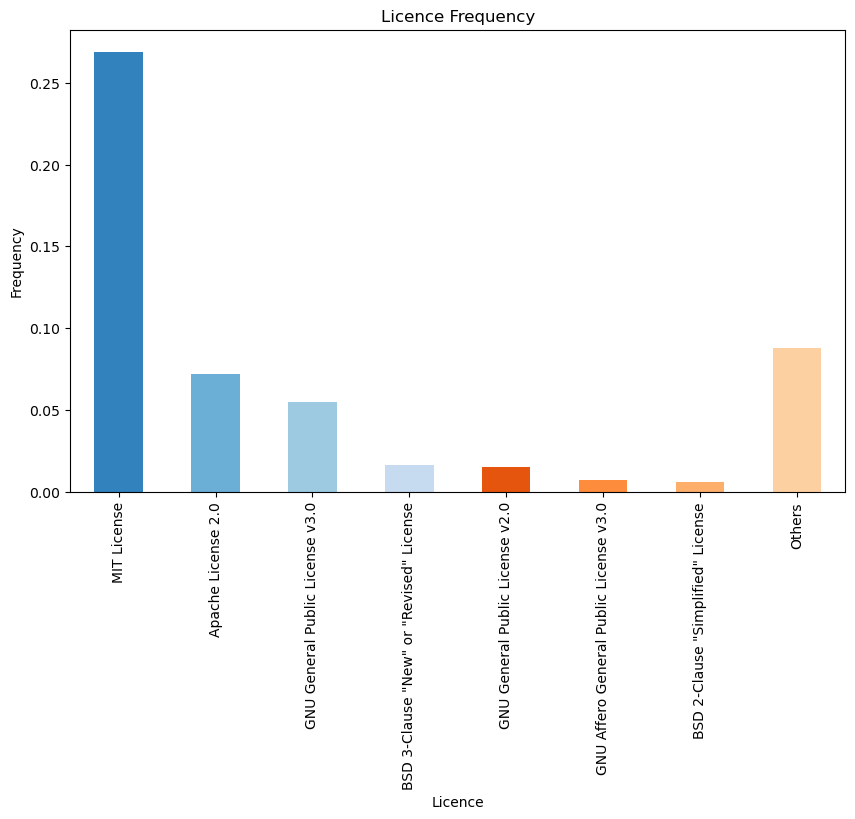

In [11]:
# 统计 licence 字段中许可证的频率，排除值为 'Unknown'
licence_freq = repository_data['licence'].value_counts(normalize=True)
licence_freq.drop(index='Unknown', inplace=True)

# 将频率小于0.005的许可证和值为 'Other' 的许可证合并到 'Others' 中
others_freq = licence_freq[(licence_freq < 0.005) | (licence_freq.index == 'Other')].sum()
licence_freq = licence_freq[(licence_freq >= 0.005) & (licence_freq.index != 'Other')]
licence_freq['Others'] = others_freq

# 设置直方图颜色和样式
colors = plt.cm.tab20c.colors

# 绘制直方图
plt.figure(figsize=(10, 6))
licence_freq.plot(kind='bar', color=colors)
plt.title('Licence Frequency')
plt.xlabel('Licence')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # 将横坐标文本旋转90度
plt.show()


<font> 从图中看出主MIT License是使用频率最高的license